In [51]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("../data/processed/toxicity_analysis_perspective.csv")

In [53]:
df.columns

Index(['id', 'search_tag', 'create_time', 'video_desc', 'stickers_on_video',
       'video_hashtags', 'video_duration_in_sec', 'is_duet_enabled',
       'duet_from_id', 'music_id', 'music_title', 'music_url', 'music_author',
       'music_is_original_audio', 'digg_count', 'share_count', 'comment_count',
       'play_count', 'author_unique_id', 'author_nickname', 'author_avatar',
       'author_signature', 'author_is_verified', 'author_duet_setting',
       'author_following_count', 'author_followers_count',
       'author_heart_count', 'author_digg_count', 'author_heart', 'video_path',
       'video_url', 'transcription', 'video_contains_music',
       'video_contains_male', 'video_contains_female', 'video_contains_noise',
       'video_contains_no_energy', 'segments', 'total_music_duration',
       'percentage_of_video_made_of_music', 'full_text', 'toxicity',
       'severe_toxicity', 'identity_attack', 'insult', 'profanity', 'threat'],
      dtype='object')

In [54]:
selected_columns = ['id', 'search_tag', 'create_time', 'video_desc', 'stickers_on_video', 'video_hashtags',
                    'digg_count', 'share_count', 'comment_count', 'play_count', 'transcription', 'full_text',
                    'toxicity', 'severe_toxicity', 'identity_attack', 'insult', 'profanity', 'threat']

df = df[selected_columns].copy()

In [55]:
df.columns

Index(['id', 'search_tag', 'create_time', 'video_desc', 'stickers_on_video',
       'video_hashtags', 'digg_count', 'share_count', 'comment_count',
       'play_count', 'transcription', 'full_text', 'toxicity',
       'severe_toxicity', 'identity_attack', 'insult', 'profanity', 'threat'],
      dtype='object')

In [56]:
# Create df_toxic with toxicity >= 0.7
df_toxic = df[df['toxicity'] >= 0.7]

# Create df_non_toxic with toxicity < 0.7
df_non_toxic = df[df['toxicity'] < 0.7]

In [57]:
# Take 3 random samples from the toxic DataFrame
toxic_samples = df_toxic['transcription'].sample(n=3)

# Take 3 random samples from the non-toxic DataFrame
non_toxic_samples = df_non_toxic['transcription'].sample(n=3)

# Print the 'full_text' column values of the toxic samples
print("Toxic Samples:")
for sample in toxic_samples:
    print(sample)
    print("---")

# Print the 'full_text' column values of the non-toxic samples
print("Non-Toxic Samples:")
for sample in non_toxic_samples:
    print(sample)
    print("---")

Toxic Samples:
Never seen a pretty Trump supporter and if you're offended you should be because you're fucking ugly
---
I'm sorry, but this has to be said. Florida, bitch, you need to start reading the room. Read the room, bitch, read the chart. You see the bad important bitches, the one that the only reason revenue comes into Florida, bitch, you see them? Yeah, Miami, Tampa, Orlando, Tallahassee. I mean, I don't really go to Jacksonville, but Kiki, and then that other little square blue bitch that voted for us, read the fucking room, okay? Read the room, bitch, because guess what? I've lived in Orlando my whole life, and I've never had a fantasy of fucking traveling to Sarasota, bitch. What the fuck? Who comes here for that bitch? No one. When they come here, they go, Disney, Capitol. Bitch, we voted for the right side, so what? Fuck is this? Oh my God, I cannot believe I woke up to this buffalery. This is so nasty. This makes no sense. New bitches are zero. They didn't even put your 

In [42]:
# Filter transcriptions with toxicity score between 0.6 and 0.7 and select 5 random samples
transcriptions_06_07 = df[(df['toxicity'] > 0.6) & (df['toxicity'] <= 0.7)]['transcription'].sample(n=5)

# Filter transcriptions with toxicity score greater than 0.7 and select 5 random samples
transcriptions_gt_07 = df[df['toxicity'] > 0.7]['transcription'].sample(n=5)

# Print transcriptions with toxicity score between 0.6 and 0.7
print("Transcriptions with toxicity score between 0.6 and 0.7:")
for transcription in transcriptions_06_07:
    print(transcription)
    print("---")

# Print transcriptions with toxicity score greater than 0.7
print("Transcriptions with toxicity score greater than 0.7:")
for transcription in transcriptions_gt_07:
    print(transcription)
    print("---")

Transcriptions with toxicity score between 0.6 and 0.7:
I said he's a scumbag, don't you know?
---
You're as racist as a Klansman dipped in dumb You're a rotten orange with claim they cheered on 9-11 Now you want to ban them all, Donald Trump I wouldn't touch you despite your 39 and a half percent lead in the poll
---
So let's ride, bitches
---
Have a question for you real quick what Trump or Biden Trump? Oh nice Trump or Biden Biden and what about it? Thank God. Honestly orange man bad. That was a little scary. You scared me for a second there Trump or Biden Like Yeah, nice Question for you. Oh you have a good I did trumpet Biden neither If you had to pick one Biden oh fuck dude. I'm so happy. Thank God. Honestly like oh
---
Donald Trump, you dirty scum, you're fired, you draft dodger. You're one big hemorrhoid to this country. You should see a proctologist and have yourself removed.
---
Transcriptions with toxicity score greater than 0.7:
You know, I don't care what your fucking race

In [45]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string
import re

# Assuming you have already defined df_toxic as shown in your code

# Combine all transcriptions into a single string
transcription_text = ' '.join(df_toxic['transcription'])

# Tokenize the text into individual words
tokens = word_tokenize(transcription_text)

# Convert words to lowercase
tokens = [word.lower() for word in tokens]

# Remove contractions
contractions = {
    "n't": "not",
    "'s": "is",
    "'re": "are",
    "'m": "am",
    "'ll": "will",
    "'ve": "have"
}
contractions_pattern = re.compile(r"\b(" + "|".join(contractions.keys()) + r")\b")
tokens = [contractions[word] if word in contractions else word for word in tokens]

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]

# Calculate the frequency distribution of the words
freq_dist = FreqDist(filtered_tokens)

# Get the top 10 most common words
top_words = freq_dist.most_common(10)

# Calculate the total number of toxic videos
total_toxic_videos = len(df_toxic)

# Print the top 10 words and their usage percentage
print("Top 10 Words in Toxic Videos:")
for word, frequency in top_words:
    usage_percentage = (frequency / total_toxic_videos) * 100
    print(f"{word}: {usage_percentage:.2f}%")

Top 10 Words in Toxic Videos:
trump: 85.26%
fucking: 68.42%
like: 60.00%
fuck: 56.84%
shit: 36.84%
oh: 34.74%
know: 31.58%
bitch: 30.53%
go: 26.32%
donald: 26.32%


In [44]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.util import ngrams
import string
import re

# Assuming you have already defined df_toxic as shown in your code

# Combine all transcriptions into a single string
transcription_text = ' '.join(df['transcription'])

# Tokenize the text into individual words
tokens = word_tokenize(transcription_text)

# Convert words to lowercase
tokens = [word.lower() for word in tokens]

# Remove contractions
contractions = {
    "n't": "not",
    "'s": "is",
    "'re": "are",
    "'m": "am",
    "'ll": "will",
    "'ve": "have"
}
contractions_pattern = re.compile(r"\b(" + "|".join(contractions.keys()) + r")\b")
tokens = [contractions[word] if word in contractions else word for word in tokens]

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]

# Generate bigrams
bigrams = list(ngrams(filtered_tokens, 3))

# Calculate the frequency distribution of the bigrams
freq_dist = FreqDist(bigrams)

# Get the top 10 most common bigrams
top_bigrams = freq_dist.most_common(10)

# Calculate the total number of toxic videos
total_toxic_videos = len(df_toxic)

# Print the top 10 bigrams and their usage percentage
print("Top 10 Bigrams in Toxic Videos:")
for bigram, frequency in top_bigrams:
    bigram_text = ' '.join(bigram)
    usage_percentage = (frequency / total_toxic_videos) * 100
    print(f"{bigram_text}: {usage_percentage:.2f}%")


Top 10 Bigrams in Toxic Videos:
black lives matter: 43.16%
president united states: 24.21%
want take away: 14.74%
oof oof oof: 13.68%
gon na go: 12.63%
fuck donald trump: 10.53%
make america great: 10.53%
gon na get: 10.53%
donald j. trump: 8.42%
says well trump: 8.42%


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import numpy as np

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

# Define the toxicity ranges
toxicity_ranges = [(i / 10, (i + 1) / 10) for i in range(10)]

# Calculate the cosine similarity matrix
similarity_matrix = np.zeros((10, 10))

# Iterate over the toxicity ranges
for i, toxicity_range in enumerate(toxicity_ranges):
    # Get the texts for the current toxicity range
    texts = df[(df['toxicity'] >= toxicity_range[0]) & (df['toxicity'] < toxicity_range[1])]['transcription']
    
    # Filter out empty or stop word texts
    texts = [text for text in texts if text.strip() and text not in stopwords.words('english')]
    
    if texts:
        # Calculate the TF-IDF vectors for the texts
        tfidf_vectors = tfidf_vectorizer.fit_transform(texts)
        
        # Calculate the cosine similarity matrix for the texts
        similarity_scores = cosine_similarity(tfidf_vectors)
        
        similarity_matrix[i, i] = np.mean(similarity_scores)  # Set the diagonal value as the mean similarity
        
        if i < 9:
            upper_similarity_scores = similarity_scores[np.triu_indices(len(similarity_scores), k=1)]
            lower_similarity_scores = similarity_scores[np.tril_indices(len(similarity_scores), k=-1)]
            similarity_matrix[i, i+1:] = np.mean(upper_similarity_scores)  # Set the upper triangular values as the mean similarity
            similarity_matrix[i+1:, i] = np.mean(lower_similarity_scores)  # Set the lower triangular values as the mean similarity

# Convert the similarity matrix to a DataFrame
similarity_df = pd.DataFrame(similarity_matrix, columns=np.arange(0, 1, 0.1), index=np.arange(0, 1, 0.1))

In [63]:
similarity_df

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0.0,0.024176,0.017157,0.017157,0.017157,0.017157,0.017157,0.017157,0.017157,0.017157,0.017157
0.1,0.017157,0.024054,0.020315,0.020315,0.020315,0.020315,0.020315,0.020315,0.020315,0.020315
0.2,0.017157,0.020315,0.028400,0.023493,0.023493,0.023493,0.023493,0.023493,0.023493,0.023493
0.3,0.017157,0.020315,0.023493,0.030383,0.025630,0.025630,0.025630,0.025630,0.025630,0.025630
0.4,0.017157,0.020315,0.023493,0.025630,0.039496,0.030603,0.030603,0.030603,0.030603,0.030603
0.5,0.017157,0.020315,0.023493,0.025630,0.030603,0.044967,0.030923,0.030923,0.030923,0.030923
0.6,0.017157,0.020315,0.023493,0.025630,0.030603,0.030923,0.040189,0.027219,0.027219,0.027219
0.7,0.017157,0.020315,0.023493,0.025630,0.030603,0.030923,0.027219,0.051034,0.032427,0.032427
0.8,0.017157,0.020315,0.023493,0.025630,0.030603,0.030923,0.027219,0.032427,0.071670,0.043539
0.9,0.017157,0.020315,0.023493,0.025630,0.030603,0.030923,0.027219,0.032427,0.043539,0.159520


In [65]:
from scipy import stats

# Extract the similarity values for 'toxic videos'
toxic_similarities = similarity_df.iloc[7:, 7:].values.flatten()

# Extract the similarity values for 'not toxic' videos
not_toxic_similarities = similarity_df.iloc[:7, 7:].values.flatten()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(toxic_similarities, not_toxic_similarities)

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 3.413317508491936
P-value: 0.0019735236472818445


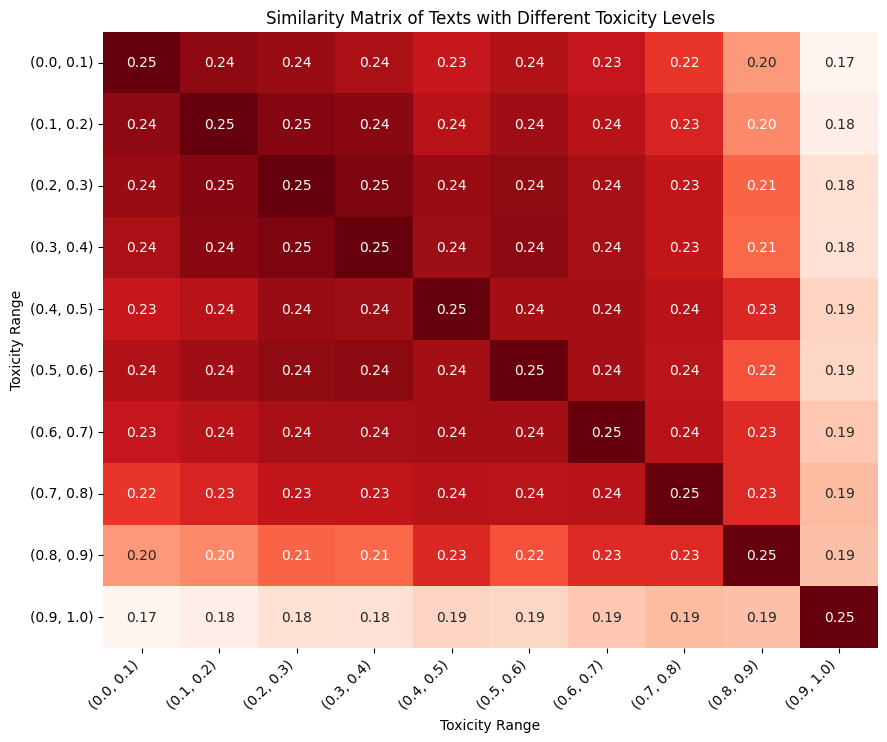

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the similarity matrix to a DataFrame
similarity_df = pd.DataFrame(similarity_matrix, columns=toxicity_ranges, index=toxicity_ranges)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap="Reds", fmt=".2f", cbar=False, mask=similarity_df.isnull())
plt.title("Similarity Matrix of Texts with Different Toxicity Levels")
plt.xlabel("Toxicity Range")
plt.ylabel("Toxicity Range")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.gca().set_yticklabels(similarity_df.columns, rotation=0, ha='right')
plt.gca().set_xticklabels(similarity_df.columns, rotation=45, ha='right')
plt.show()

In [143]:
for transcription in df_toxic.sort_values('toxicity', ascending=False).head(5)['transcription']:
    print(transcription)
    print('---')

Get the fuck off my porch! Get your ass off this motherfucking porch bitch!
---
Well, TikTok, I just came out of Walmart and apparently I'm parked right next to that bitch Karen that everybody speaks of. I'm guessing my hat triggered her because I shit you not, she walks by me and yells, fuck Trump. Yeah, one of those. But, it turns out I ordered an extra couple of these just for this kind of occasion, so... No, Karen. Fuck you.
---
It better fucking go that way. As soon as it's gonna take off and make a loud noise I'm gonna drop phone. You retarded? This motherfucker's retarded!
---
I don't know why the fuck he walked away like he did some shit bitch you didn't do shit The fact that you're depressed ass old white motherfucking orange blob self can't even sit down once once motherfucking Fucking day and say black lives matter once bitch I have never once heard you say one like fucking nice thing about fucking diverse people Like what the actual fuck is wrong with you the fucking presid

In [9]:
df_toxic.head(1)

,id,search_tag,create_time,video_desc,stickers_on_video,video_hashtags,digg_count,share_count,comment_count,play_count,transcription,full_text,toxicity,severe_toxicity,identity_attack,insult,profanity,threat
16,6771276995037875462,maga,2019-12-17 00:33:08-05:00,#fyp #rollingloud #MAGA,NaN,"fyp, rollingloud, maga",820500,44600,5415,3900000,You know your mama go whoop your ass and she s...,#fyp #rollingloud #maga you know your mama go ...,0.840319,0.563757,0.283917,0.544714,0.709284,0.491422


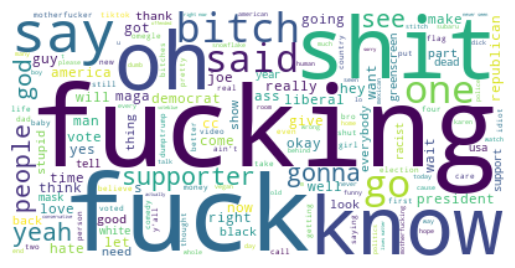

In [15]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# Join all the words in the 'transcription' column into a single string
text = ' '.join(df_toxic['full_text'])

# Create a WordCloud object with white background
wordcloud = WordCloud(stopwords=STOPWORDS.union(['fyp', 'foryoupage', 'foryou', 'donald', 'trump', 'biden', 'biden2020', 'trump2020']), background_color='white')

# Generate the word cloud
wordcloud.generate(text)

# Plot the word cloud on a white canvas
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [127]:
# Create a set of stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = ["fyp", "trump", "donald", "biden", "trump2020", "biden2020"]
stop_words.update(additional_stopwords)  # Add words to the stopwords set

# Tokenize words and remove stopwords
df_toxic['full_text'] = df_toxic['full_text'].apply(lambda x: word_tokenize(x.lower()))
df_toxic['full_text'] = df_toxic['full_text'].apply(lambda x: [word for word in x if word.isalnum() and word not in stop_words])

# Calculate frequency distribution of words
all_words = [word for text in df_toxic['full_text'] for word in text]
fdist = FreqDist(all_words)

C:\Users\snell\AppData\Local\Temp\ipykernel_168\881432960.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toxic['full_text'] = df_toxic['full_text'].apply(lambda x: word_tokenize(x.lower()))
C:\Users\snell\AppData\Local\Temp\ipykernel_168\881432960.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toxic['full_text'] = df_toxic['full_text'].apply(lambda x: [word for word in x if word.isalnum() and word not in stop_words])


In [128]:
# Get top 10 words
top_words = fdist.most_common(10)
top_words_table = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
print(top_words_table)

      Word  Frequency
0  fucking         66
1     like         64
2     fuck         56
3     shit         37
4       oh         33
5     know         32
6    bitch         29
7      one         27
8       na         27
9       go         26
